# 20.1

In [1]:
# Load libraries
from sklearn import preprocessing
import numpy as np

# Create feature
features = np.array(
    [
        [-100.1, 3240.1],
        [-200.2, -234.1],
        [5000.5, 150.1],
        [6000.6, -125.1],
        [9000.9, -673.1]
    ]
)

# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
features_standardized = scaler.fit_transform(features)

# Show feature
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [2]:
# Print mean and standard deviation
print('Mean: ', round(features_standardized[:,0].mean()))
print('Standard deviation: ', round(features_standardized[:,0].std()))

Mean:  0
Standard deviation:  1


# 20.2

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Load libraries
from keras import models
from keras import layers

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(10,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile neural network
network.compile(
    loss='binary_crossentropy', # Cross-entropy
    optimizer='rmsprop', # Root Mean Square Propagation
    metrics=['accuracy'] # Accuracy performance metric
)

# 20.3

In [4]:
# Load libraries
import numpy as np
from keras. datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile neural network
network.compile(
    loss='binary_crossentropy', # Cross-entropy
    optimizer='rmsprop', # Root Mean Square Propagation
    metrics=['accuracy'] # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train, # Features
    target_train, # Target vector
    epochs=3, # Number of epochs
    verbose=1, # Print description after each epoch
    batch_size=100, # Number of observations per batch
    validation_data=(features_test, target_test) # Test data
)

17464789/17464789 [==============================] - 3s 0us/step
Epoch 1/3
250/250 [==============================] - 5s 10ms/step - loss: 0.4226 - accuracy: 0.8125 - val_loss: 0.3324 - val_accuracy: 0.8601
Epoch 2/3
250/250 [==============================] - 2s 7ms/step - loss: 0.3219 - accuracy: 0.8650 - val_loss: 0.3355 - val_accuracy: 0.8566
Epoch 3/3
250/250 [==============================] - 2s 7ms/step - loss: 0.3122 - accuracy: 0.8699 - val_loss: 0.3231 - val_accuracy: 0.8611


In [5]:
# View shape of feature matrix
features_train.shape

(25000, 1000)

# 20.4

In [6]:
# Load libraries
import numpy as np
from keras. datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 5000

# Load feature and target data
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

# Convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# One-hot encode target vector to create a target matrix
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation='relu'))

# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=46, activation='softmax'))

# Compile neural network
network.compile(
    loss='categorical_crossentropy', # Cross-entropy
    optimizer='rmsprop', # Root Mean Square Propagation
    metrics=['accuracy'] # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train, # Features
    target_train, # Target
    epochs=3, # Three epochs
    verbose=0, # No output
    batch_size=100, # Number of observations per batch
    validation_data=(features_test, target_test) # Test data
)

2110848/2110848 [==============================] - 9s 4us/step


In [7]:
# View target matrix
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 20.5

In [8]:
# Load libraries
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Set random seed
np.random.seed(0)

# Generate features matrix and target vector
features, target = make_regression(n_samples=10000, n_features=3, n_informative=3, n_targets=1, noise=0.0, random_state=0)

# Divide our data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=0)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu', input_shape=(features_train.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu'))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

# Compile neural network
network.compile(
    loss='mse', # Mean squared error
    optimizer='RMSprop', # Optimization algorithm
    metrics=['mse'] # Mean squared error
)

# Train neural network
history = network.fit(
    features_train, # Features
    target_train, # Target vector
    epochs=10, # Number of epochs
    verbose=0, # No output
    batch_size=100, # Number of observations per batch
    validation_data=(features_test, target_test) # Test data
)

# 20.6

In [10]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from IMDB movie data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert IMDB data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile neural network
network.compile(
    loss='binary_crossentropy', # Cross-entropy
    optimizer='rmsprop', # Root Mean Square Propagation
    metrics=['accuracy'] # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train, # Features
    target_train, # Target vector
    epochs=3, # Number of epochs
    verbose=0, # No output
    batch_size=100, # Number of observations per batch
    validation_data=(features_test, target_test) # Test data
)

# Predict classes of test set
predicted_target = network.predict(features_test)

782/782 [==============================] - 2s 2ms/step


In [13]:
# View the probability the first observation is class 1
predicted_target[0]

array([0.36109686], dtype=float32)

# 20.7

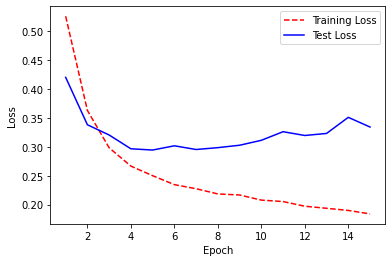

In [18]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 3000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile neural network
network.compile(
    loss='binary_crossentropy', # Cross-entropy
    optimizer='rmsprop', # Root Mean Square Propagation
    metrics=['accuracy'] # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train, # Features
    target_train, # Target
    epochs=15, # Number of epochs
    verbose=0, # No output
    batch_size=1000, # Number of observations per batch
    validation_data=(features_test, target_test) # Test data
)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

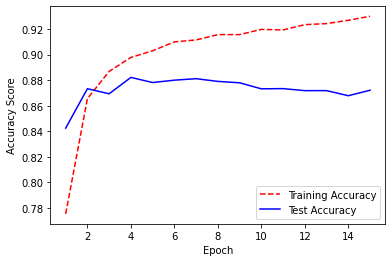

In [20]:
# Get training and test accuracy histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

# Visualize accuracy history
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show()

# 20.8

In [21]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile neural network
network.compile(
    loss='binary_crossentropy', # Cross-entropy
    optimizer='rmsprop', # Root Mean Square Propagation
    metrics=['accuracy'] # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train, # Features
    target_train, # Target vector
    epochs=3, # Number of epochs
    verbose=0, # No output
    batch_size=100, # Number of observations per batch
    validation_data=(features_test, target_test) # Test data
)

# 20.9

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile neural network
network.compile(
    loss='binary_crossentropy', # Cross-entropy
    optimizer='rmsprop', # Root Mean Square Propagation
    metrics=['accuracy'] # Accuracy performance metric
)

# Set callback functions to early stop training and save the best model so far
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
]

# Train neural network
history = network.fit(
    features_train, # Features
    target_train, # Target vector
    epochs=20, # Number of epochs
    callbacks=callbacks, # Early stopping
    verbose=0, # Print description after each epoch
    batch_size=100, # Number of observations per batch
    validation_data=(features_test, target_test) # Test data
)

# 20.10

In [3]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# Start neural network
network = models.Sequential()

# add a dropout layer for input layer
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile neural network
network.compile(
    loss='binary_crossentropy', # Cross-entropy
    optimizer='rmsprop', # Root Mean Square Propagation
    metrics=['accuracy'] # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train, # Features
    target_train, # Target vector
    epochs=3, # Number of epochs
    verbose=0, # No output
    batch_size=100, # Number of observations per batch
    validation_data=(features_test, target_test) # Test data
)

# 20.11

In [4]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile neural network
network.compile(
    loss='binary_crossentropy', # Cross-entropy
    optimizer='rmsprop', # Root Mean Square Propagation
    metrics=['accuracy'] # Accuracy performance metric
)

# Set callback functions to early stop training and save the best model so far
checkpoint = [
    ModelCheckpoint(filepath='best_model.hdf5')
]

# Train neural network
history = network.fit(
    features_train, # Features
    target_train, # Target vector
    epochs=3, # Number of epochs
    callbacks=checkpoint, # Checkpoint
    verbose=0, # No output
    batch_size=100, # Number of observations per batch
    validation_data=(features_test, target_test) # Test data
)

# 20.12

In [9]:
# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(
    n_samples=10000, n_features=number_of_features, n_informative=3, n_redundant=0, n_classes=2, weights=[.5,.5], random_state=0
)

# Create function returning a compiled network
def create_network():

    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(
        loss='binary_crossentropy', # Cross-entropy
        optimizer='rmsprop', # Root Mean Square Propagation
        metrics=['accuracy'] # Accuracy performance metric
    )

    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, epochs=10, batch_size=100, verbose=0)

# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, features, target, cv=3)

array([0.89232153, 0.88628864, 0.87188721])

# 20.13

In [10]:
# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(
    n_samples=10000, n_features=number_of_features, n_informative=3, n_redundant=0, n_classes=2, weights=[.5,.5], random_state=0
)

# Create function returning a compiled network
def create_network(optimizer='rmsprop'):

    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(
        loss='binary_crossentropy', # Cross-entropy
        optimizer=optimizer, # Optimizer
        metrics=['accuracy'] # Accuracy performance metric
    )

    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

# Create hyperparameter space
epochs = [5,10]
batches = [5,10,100]
optimizers = ['rmsprop', 'adam']

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# Crete grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# Fit grid search
grid_result = grid.fit(features, target)

In [11]:
# View hyperparameters of best neural network
grid_result.best_params_

{'batch_size': 10, 'epochs': 5, 'optimizer': 'adam'}

# 20.14

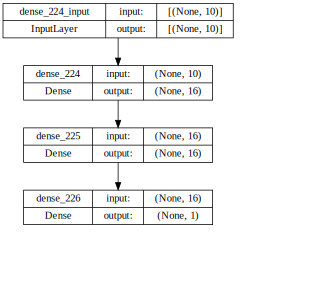

In [12]:
# Load libraries
from keras import models
from keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(10,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

# visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog='dot', format='svg'))

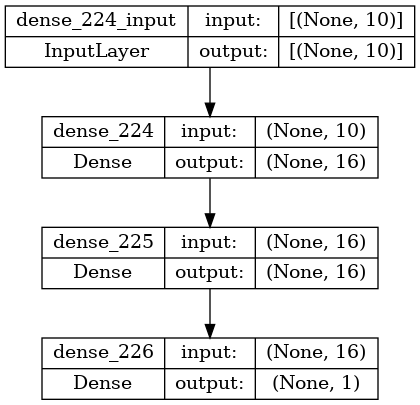

In [13]:
# Save the visualization as a file
plot_model(network, show_shapes=True, to_file='network.png')

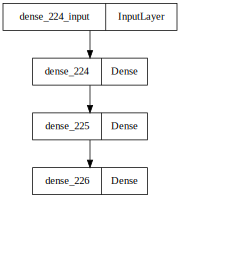

In [14]:
# Visualize network architecture
SVG(model_to_dot(network, show_shapes=False).create(prog='dot', format='svg'))